# Incomplete; finish

### Problem

In a finite sequence of $s$ independent tosses of a fair coin, what is the average number of runs of length $r$? A run is a maximal consecutive subsequence of the same symbol. (The symbols for a coin are typically denoted H (Heads) and T (Tails), but they could just as well be 0 and 1.) Let $N(r,s)$ denote the sum of the number of runs of length $r$ over all $2^s$ samples of length $s$. The question reduces to finding the formula for $N(r, s)$ and dividing by $2^s$ to get the average number.

In [6]:
from IPython.display import Image

Just to make sure we are on the same page, here are the counts for $N(r,3)$.

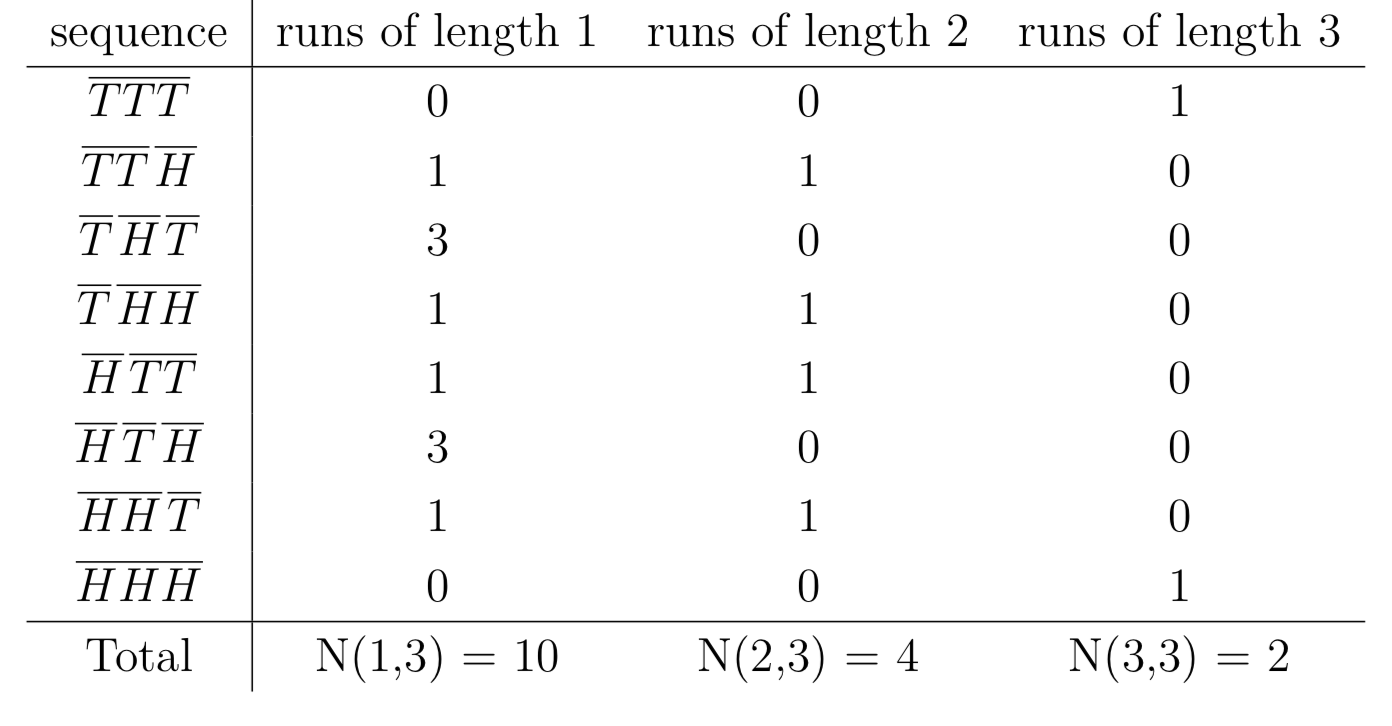

In [5]:
Image(filename="runs.png", width=600, height=600)

### Answer

#### The general idea: a recursion relation

Our first step is to prove that, for fixed $s\geq3$, and variable $r\leq s$, the number of runs of length $r$ over all sequences of length $s$, which we denote $N(r,s)$, satisfies the following recursion relation
\begin{align}
&N(s,s)=2,\\
&N(s-1,s)=4,\\
&N(s-k,s)=2N(s-k+1,s)+2^{k-1}.
\end{align}

For $s\leq2$, one can quickly manually check that $N(1,1)=2$, and $N(2,2)=2, N(2,1)=4$.

For $s\geq3$, the 

#### From recursion relation to closed formula

The first two equations can be verified manually.

For the third equation, we construct a bijection between the runs of length $k$ in all sequences of length $s-1$ to the the runs of length $k+1$ in all sequences of length $s$.  First, we need some notation.

Let $\Omega^{k}_{s-1}$ be the set of all runs of length $k$ in sequences of length $s-1$.  We will refer to elements in $\Omega^{k}_{s-1}$ by specifying the full sequence $\omega^{s-1}=\omega_1\dots\omega_{s-1}=\in\Omega_{s-1}$ of length $s-1$, and the start and final indices of the run of length $k$, $i$ and $i+k-1$ respectively, where $i\in\{1,\dots,s-1\}$, and $i+k-1\in\{1,\dots,s-1\}$.

In other words, if $(i,i+k-1,\omega^{s-1})\in\Omega^{k}_{s-1}$, we have $\omega_{i-1}\neq\omega_i=\omega_{i+1}=\dots=\omega_{i+k-2}=\omega_{i+k-1}\neq\omega_{i+k}:$
\begin{equation}
\overbrace{\omega_1\dots\omega_{i-1}\underbrace{\omega_i\dots\omega_{i+k-1}}_{\text{run of length }k}\omega_{i+k}\dots\omega_{s-1}}^{\text{sequence of length }s-1}
\end{equation}
Note that the endpoints of the run have to be properly interpreted in some edges cases.  For example, if $i=1$, $\omega_{i-1}$ is undefined, in which case ignore the leftmost inequality.  Similarly, if $i+k-1=s-1$, then $\omega_{i+k}$ is undefined, in which case we ignore the rightmost inequality.

With the notation established, we are ready to specify the bijection.
\begin{align}
F:\Omega^{k}_{s-1}\rightarrow\Omega^{k+1}_{s},\\
F[(i,i+k-1,\omega^{s-1})]=(i,i+k,\omega^{s}),
\end{align}
where $\omega^{s}$ can be constructed from $\omega^{s-1}$ by extending the run the run of length $k$ to a run of length $k+1$ by choosing $\omega_s=\omega_{i+k-1}$, and "placing it" immediately after $\omega_{i+k-1}$.  In other words,
\begin{equation}
\omega^{s}=\overbrace{\omega_1\dots\omega_{i-1}\underbrace{\omega_i\dots\omega_{i+k-1}\omega_s}_{\text{run of length }k+1}\omega_{i+k}\dots\omega_{s-1}}^{\text{sequence of length }s}
\end{equation}

### Code

In [35]:
from collections import defaultdict

In [77]:
def N(s):
    if s==1:
        return {1: 2}
    else:
        r = {i:0 for i in range(1,s+1)}
        for i in range(2**s):
            seq = '0'*(s-len(bin(i)[2:])) + bin(i)[2:]
            current = seq[0]
            run = 1
            for t in seq[1:-1]:
                if t==current:
                    run+=1
                else:
                    # run has ended
                    r[run] +=1
                    # now we start with run length 1 again
                    run = 1
                    # run has current coin toss t
                    current = t
            if seq[-1]==current:
                run+=1
                r[run]+=1
            else:
                r[run]+=1
                r[1]+=1
                
        return r

In [98]:
for i in range(1,10+1):
    print(N(i))
    if i>1:
        print(N(i-1)[1]+2**(i-1)+N(i-1)[1]-2**(i-2))

{1: 2}
{1: 4, 2: 2}
5
{1: 10, 2: 4, 3: 2}
10
{1: 24, 2: 10, 3: 4, 4: 2}
24
{1: 56, 2: 24, 3: 10, 4: 4, 5: 2}
56
{1: 128, 2: 56, 3: 24, 4: 10, 5: 4, 6: 2}
128
{1: 288, 2: 128, 3: 56, 4: 24, 5: 10, 6: 4, 7: 2}
288
{1: 640, 2: 288, 3: 128, 4: 56, 5: 24, 6: 10, 7: 4, 8: 2}
640
{1: 1408, 2: 640, 3: 288, 4: 128, 5: 56, 6: 24, 7: 10, 8: 4, 9: 2}
1408
{1: 3072, 2: 1408, 3: 640, 4: 288, 5: 128, 6: 56, 7: 24, 8: 10, 9: 4, 10: 2}
3072


In [153]:
N = {10: 2, 9: 4}
n=10
for k in range(2,9+1,+1):
    N[n-k] = 2*N[n-k+1]+2**(k-1)
print(N)

{10: 2, 9: 4, 8: 10, 7: 24, 6: 56, 5: 128, 4: 288, 3: 640, 2: 1408, 1: 3072}
